# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf

Using TensorFlow backend.


In [2]:
train = pd.read_csv('C:/Users/pc/Desktop/Fashion MNIST/fashion-mnist_train.csv')
test = pd.read_csv('C:/Users/pc/Desktop/Fashion MNIST/fashion-mnist_test.csv')
df = train.copy()
test_df = test.copy()
print("Dataset imported succesfully")

Dataset imported succesfully


In [3]:
#view starting values of data set
print("Dataset Head")
print(train.head())
print("=" * 30)

Dataset Head
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0      

In [4]:
# View How many samples and how many missing values for each feature
print("Dataset Features Details")
print(train.info())
print("=" * 30)

Dataset Features Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


# Exploring the dataset
it is iportant to note that Label is the Target variable.

# Dataset Label Description
0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

# Examine Dimensions

In [5]:
print('Train: ', df.shape)
print('Test: ', test_df.shape)

Train:  (60000, 785)
Test:  (10000, 785)


So, there are 60,000 Training Samples and 10,000 Test Samples.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [6]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

# Checking for Null Values

In [7]:
 #Train DATASET
df.isnull().any().sum()

0

In [8]:
# Test DATASET
test_df.isnull().any().sum()

0

Wonderful, So there are no Null Values in both Train and Test Set.

# Visualizing the Dataset

In [9]:
# Mapping Classes lebels
clothes = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

Plotting Random Images

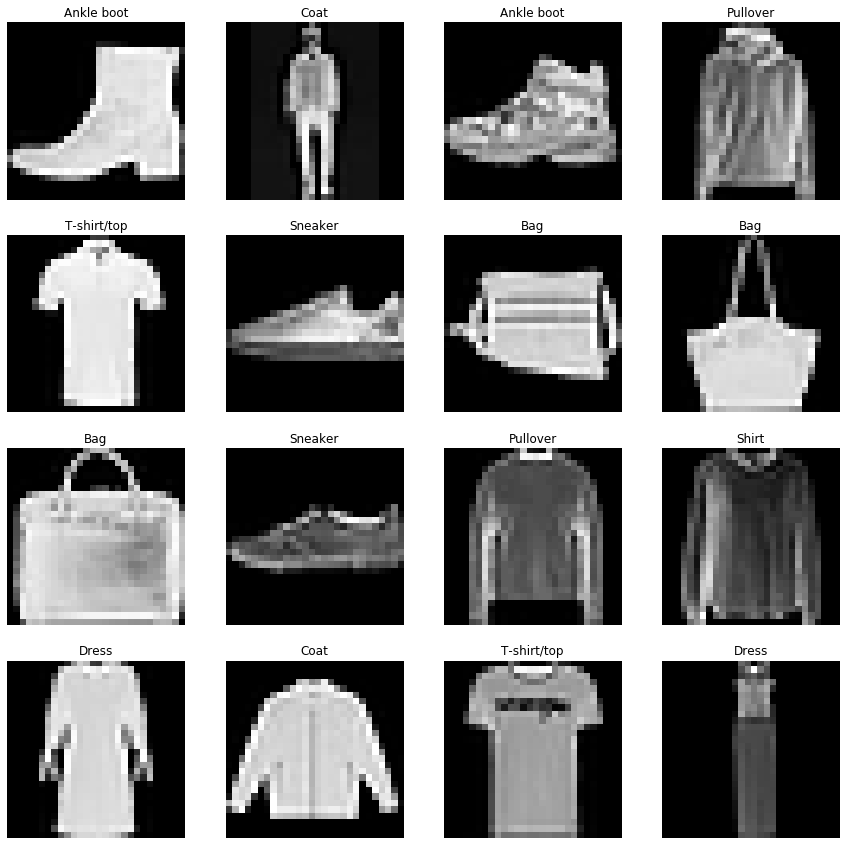

In [10]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothes[cloths])
        axe.set_axis_off()

Let's look at the Distribution of labels to anaylze if there are any skewed classes

In [11]:
df['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


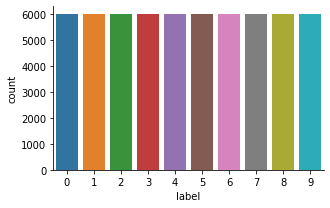

In [12]:
sns.factorplot(x='label', data=df, kind='count', size=3, aspect= 1.5)

It beautiful that all classes are equally Distributed.There is no anomalies in the dataset

In [20]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

# Split the data into train/validation/test datasets
Now we are gonna split the training data into Train and Validation Set. 

Train set is used for Training the model and Validation set is used for Evaluating our Model's Performance on the Dataset.

In [23]:
from sklearn.model_selection import train_test_split
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [24]:
x_train.shape


(43200, 28, 28, 1)

In [25]:
x_test.shape

(6000, 28, 28, 1)

In [27]:
# * unpack the tuple
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

The first parameter in reshape indicates the number of examples.
 We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

In [28]:
print(x_train.shape)
print(x_train.shape)
print(x_validate.shape)

(43200, 28, 28, 1)
(43200, 28, 28, 1)
(10800, 28, 28, 1)


# Building the Model 

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
____

In [32]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])


In [35]:
epochs = 150

history = cnn_model.fit(x_train, y_train, batch_size = 512, epochs = epochs,
                        verbose = 1, validation_data = (x_validate, y_validate))

Train on 43200 samples, validate on 10800 samples
Epoch 1/150
43200/43200 [==============================] - 76s 2ms/sample - loss: 4.3887 - acc: 0.4623 - val_loss: 0.8466 - val_acc: 0.6875
Epoch 2/150
43200/43200 [==============================] - 73s 2ms/sample - loss: 0.9502 - acc: 0.6544 - val_loss: 0.6472 - val_acc: 0.7543
Epoch 3/150
43200/43200 [==============================] - 73s 2ms/sample - loss: 0.7803 - acc: 0.7049 - val_loss: 0.5486 - val_acc: 0.7912
Epoch 4/150
43200/43200 [==============================] - 71s 2ms/sample - loss: 0.6893 - acc: 0.7388 - val_loss: 0.5318 - val_acc: 0.7856
Epoch 5/150
43200/43200 [==============================] - 71s 2ms/sample - loss: 0.6426 - acc: 0.7534 - val_loss: 0.4876 - val_acc: 0.8058
Epoch 6/150
43200/43200 [==============================] - 72s 2ms/sample - loss: 0.6032 - acc: 0.7686 - val_loss: 0.4773 - val_acc: 0.8037
Epoch 7/150
43200/43200 [==============================] - 72s 2ms/sample - loss: 0.5719 - acc: 0.7796 - val_l

# Vizualizing the Loss and Accuracy evolution 

Text(0.5, 1.0, 'Loss evolution')

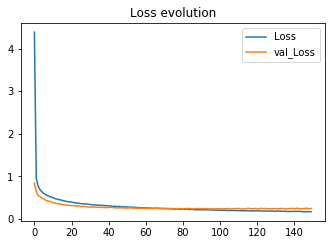

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')


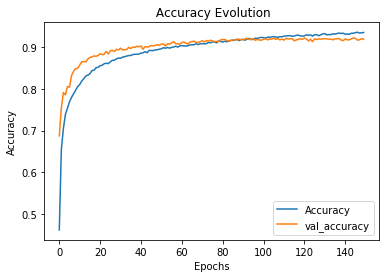

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(" Accuracy Evolution")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'val_accuracy'])
plt.show()

# Evaluating the model 

In [53]:
evaluation = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

6000/6000 [==============================] - 4s 655us/sample - loss: 0.2320 - acc: 0.9265
Test Accuracy : 0.927


# Predictions 

In [54]:
 #get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

In [55]:
test_img = x_test[0]
prediction = model.predict(x_test)
prediction[0]

array([1.4835845e-09, 1.3155711e-10, 4.3822768e-01, 1.9306255e-11,
       5.6083643e-01, 4.3774853e-18, 9.3585829e-04, 4.4857516e-21,
       4.8536983e-09, 3.6216379e-17], dtype=float32)

In [56]:
np.argmax(prediction[0])

4

KeyError: 0

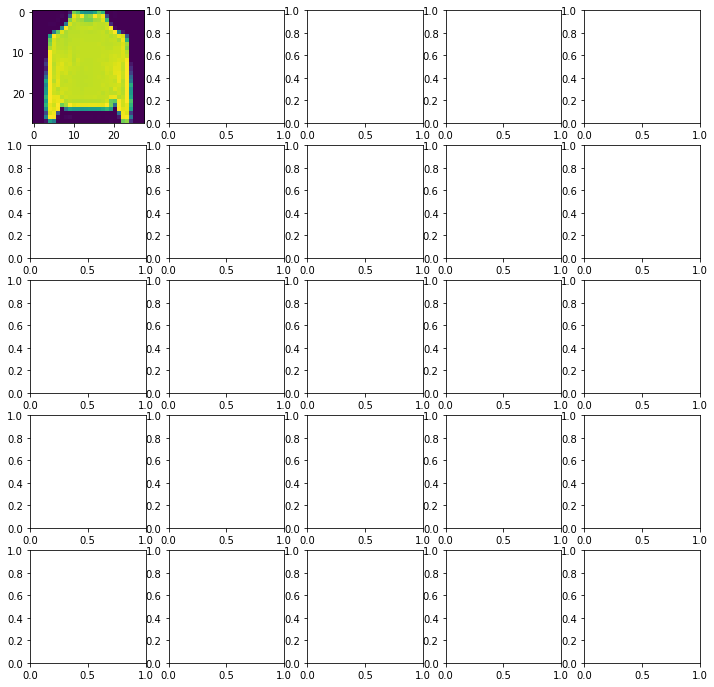

In [57]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# Confusion matrix

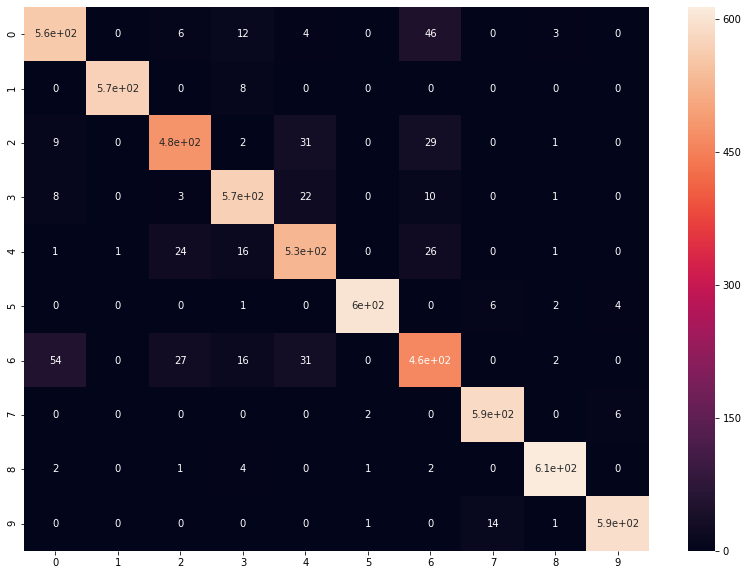

In [43]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cmatrix, annot=True)
# Sum the diagonal element to get the total true correct values

# Precision and Recall 

In [44]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.89      0.89       629
     Class 1       1.00      0.99      0.99       580
     Class 2       0.89      0.87      0.88       550
     Class 3       0.91      0.93      0.92       612
     Class 4       0.86      0.88      0.87       598
     Class 5       0.99      0.98      0.99       613
     Class 6       0.80      0.78      0.79       592
     Class 7       0.97      0.99      0.98       594
     Class 8       0.98      0.98      0.98       623
     Class 9       0.98      0.97      0.98       609

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

